In [8]:
import scipy.stats as st
import numpy as np
import pandas as pd

categorical = pd.read_csv('categorical.csv')
categorical 

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


### 2.Plot all the categorical variables with the proper plot. What can you see?

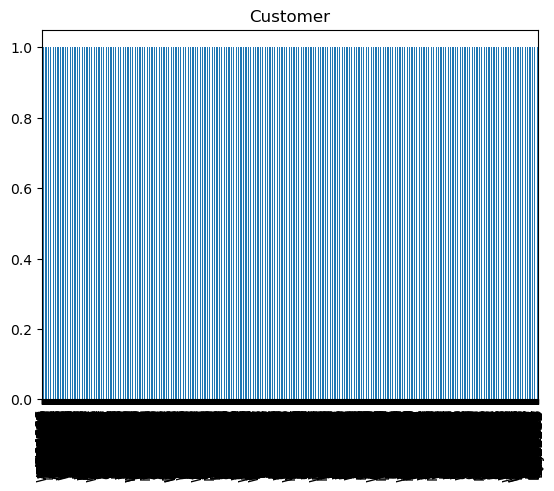

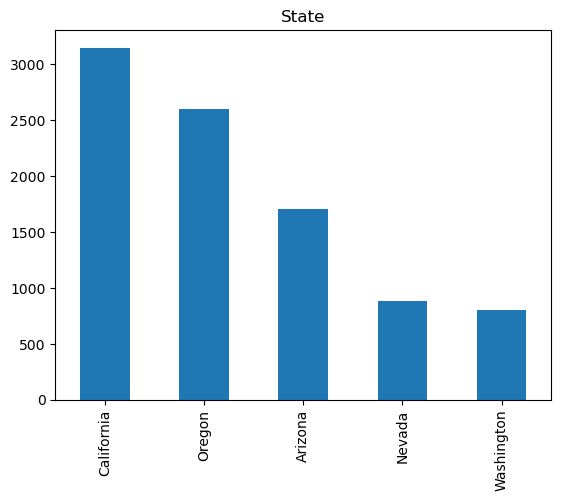

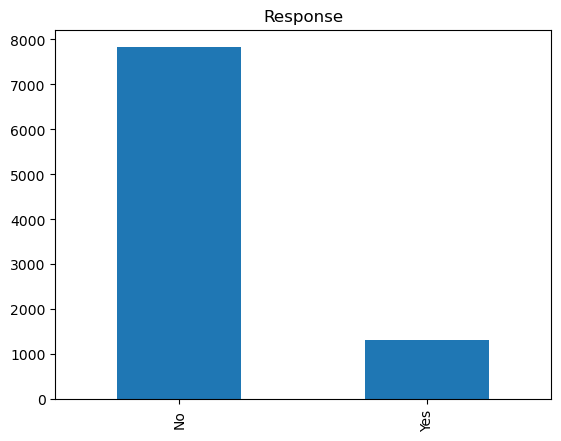

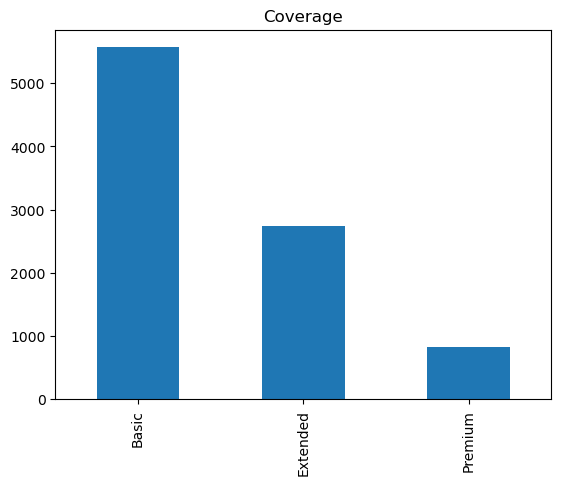

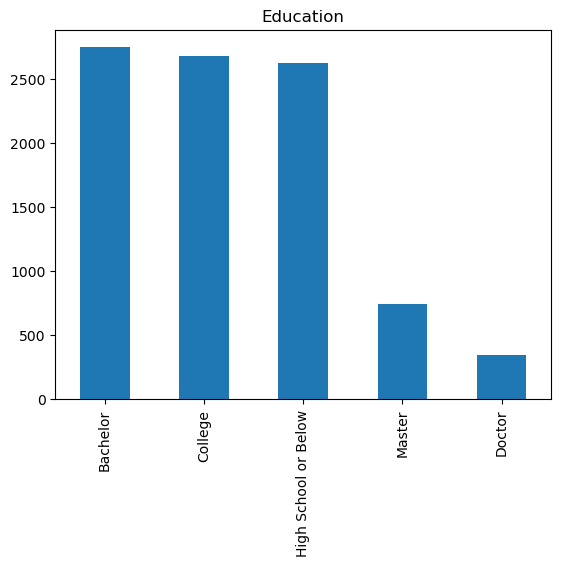

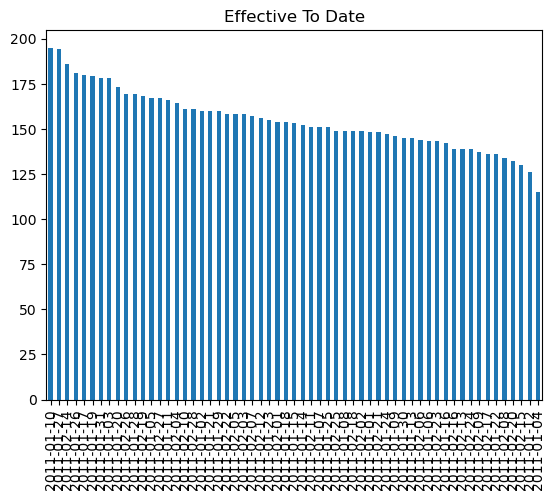

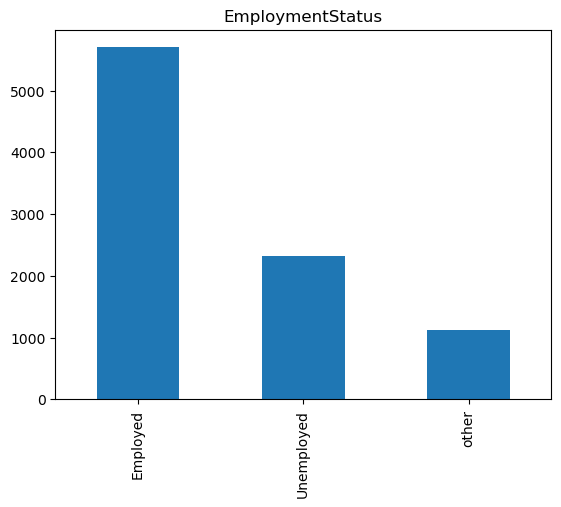

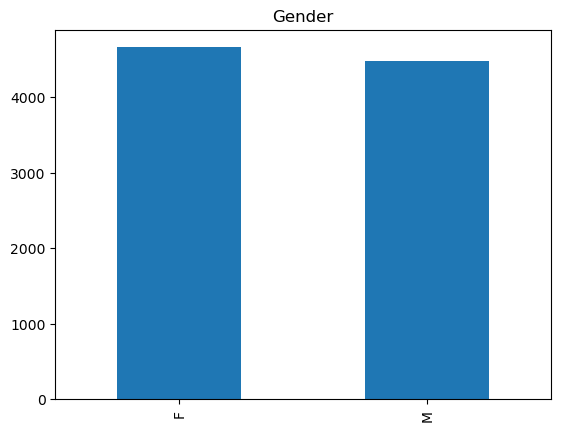

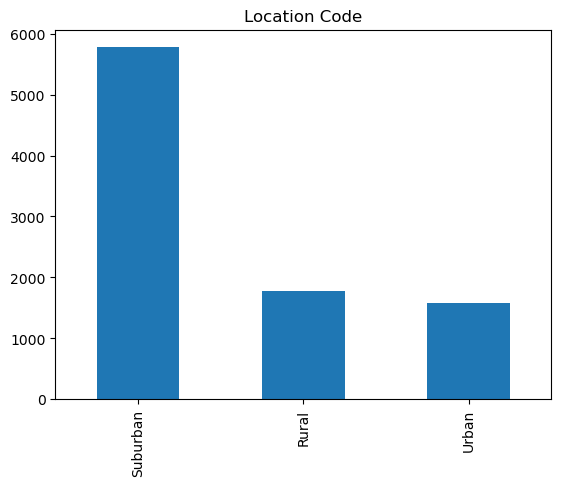

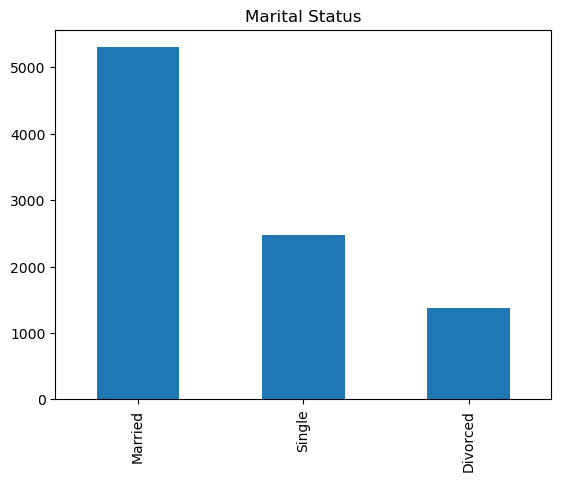

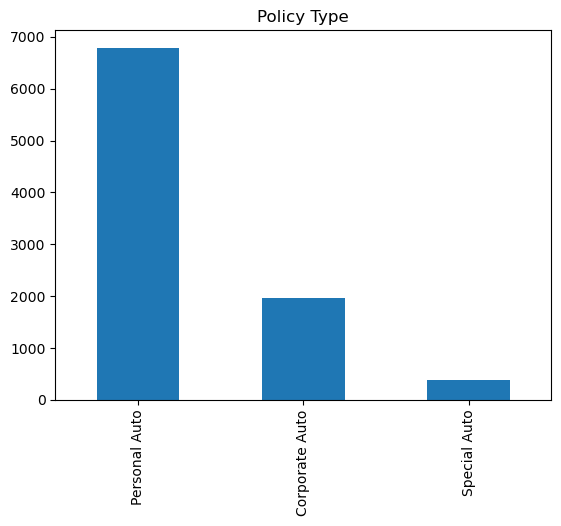

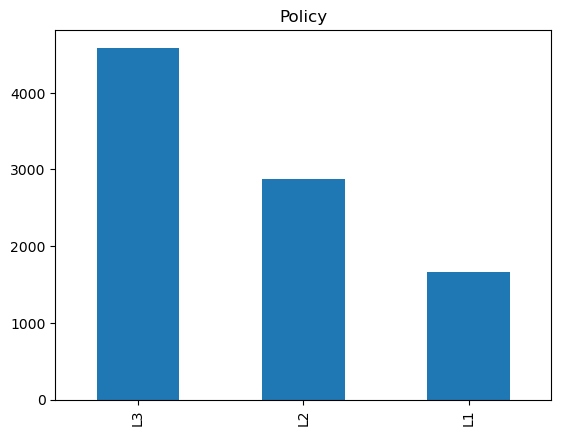

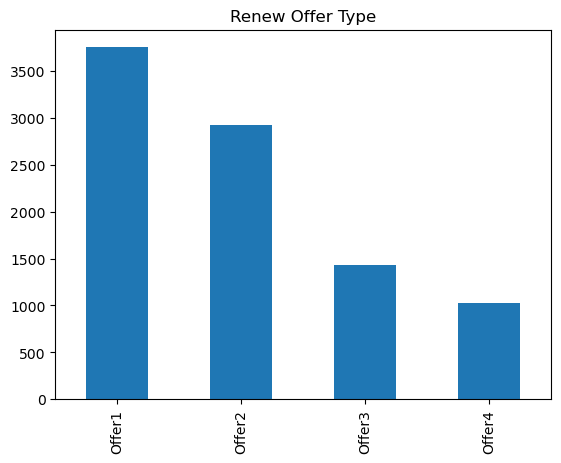

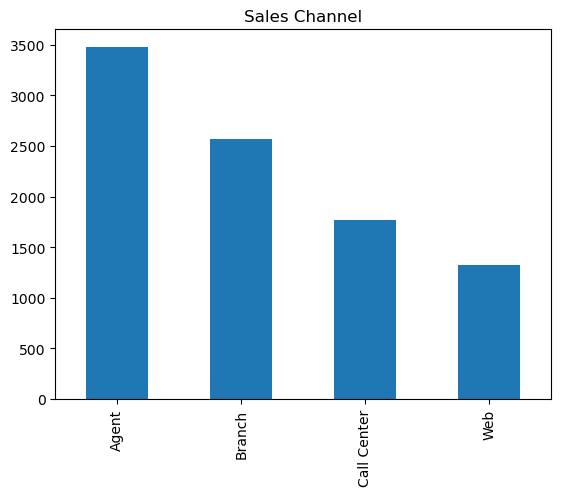

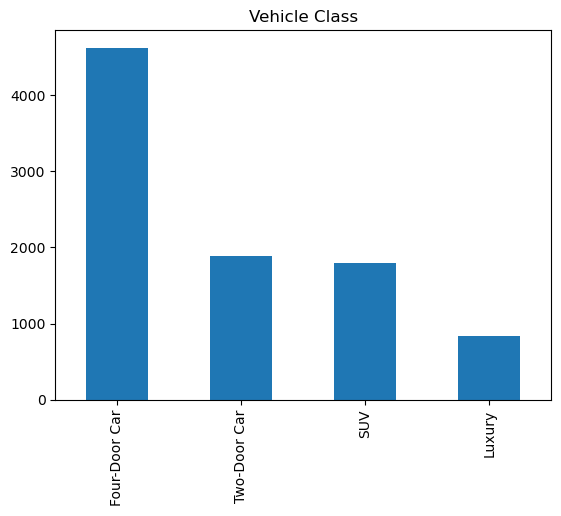

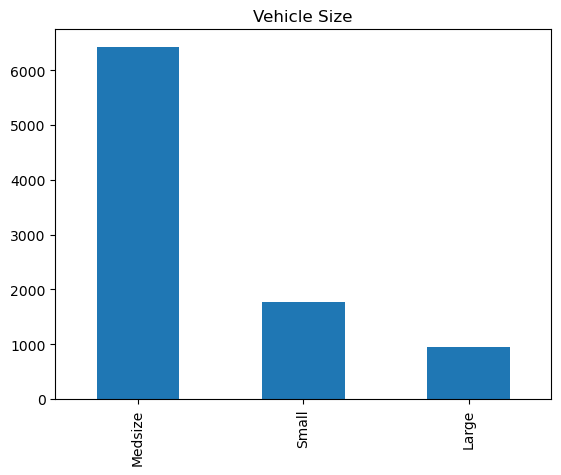

In [5]:
import matplotlib.pyplot as plt
for col in categorical.columns:
    categorical[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [ ]:
# just 'Customer' and 'Effective To Date' have more than 5 values

### 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [ ]:
# use the hypothesis test for a 95% two sided test: state and Location Code

In [6]:
data_crosstab = pd.crosstab( categorical['State'], categorical['Location Code'], margins=False)
data_crosstab

Location Code,Rural,Suburban,Urban
State,,,
Arizona,325,1080,298
California,604,1997,549
Nevada,180,550,152
Oregon,513,1640,448
Washington,151,512,135


In [9]:
st.chi2_contingency(data_crosstab)[1]
# H0:  state and Location Code are not related
# p > 0.05 ===> reject the H0 ===> we can work under the assumption that they are totally not related(independent)

0.9960201469631593

In [10]:
data_crosstab = pd.crosstab( categorical['Gender'], categorical['Marital Status'], margins=False)
data_crosstab

Marital Status,Divorced,Married,Single
Gender,,,
F,709,2779,1170
M,660,2519,1297


In [11]:
st.chi2_contingency(data_crosstab)[1]

0.00016396317825410515

In [ ]:
# there seems to be gender and marital status not independent, can drop one of them

In [12]:
data_crosstab = pd.crosstab( categorical['Education'], categorical['Coverage'], margins=False)
data_crosstab

Coverage,Basic,Extended,Premium
Education,,,
Bachelor,1729,769,250
College,1628,827,226
Doctor,200,122,20
High School or Below,1561,800,261
Master,450,224,67


In [13]:
st.chi2_contingency(data_crosstab)[1]

0.016840896351508344

### 5.The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [17]:
categorical['Effective To Date']
# convert the 'Effective To Date' column to a datetime object
categorical['Effective To Date'] = pd.to_datetime(categorical['Effective To Date'])

In [18]:
categorical['day'] = categorical['Effective To Date'].dt.day
categorical['week'] = categorical['Effective To Date'].dt.week
categorical['month'] = categorical['Effective To Date'].dt.month

C:\Users\jiaxing\AppData\Local\Temp\ipykernel_15444\2721353694.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  categorical['week'] = categorical['Effective To Date'].dt.week


In [19]:
categorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,day,week,month
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Medsize,24,8,2
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize,31,5,1
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize,19,7,2
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Medsize,20,3,1
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Medsize,10,6,2
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Medsize,12,6,2
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Medsize,6,5,2
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,3,5,2
